In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [37]:
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [4]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [36]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


In [6]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_dataset.shape

(614, 13)

In [8]:
loan_dataset.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

loan id is 614 which is equal to number of entries so no repitation(no duplicate rows).
Gender, Married, Education, Self Employed, Credit History and Loan Status are ordinal categories.
There are no zero variance predictors.

In [38]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


the mean of both applicant income and coapplicant income are greater than the median with a high standard deviation indicating positive skewness.
LoanAmount and loan amount term have moderate variablity.
the mean of credit history indicates that majority of the applicants have a credit history and hence indicates class imbalance.


In [10]:
#we can get all the column names of the dataframe
for column in loan_dataset:
  print(column)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


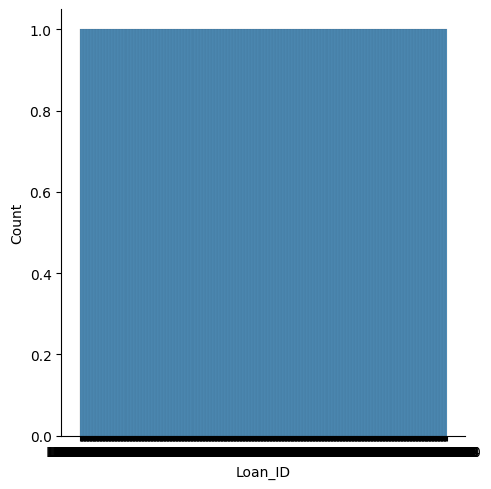

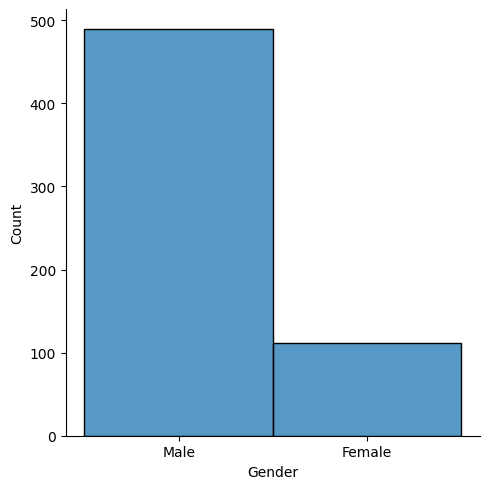

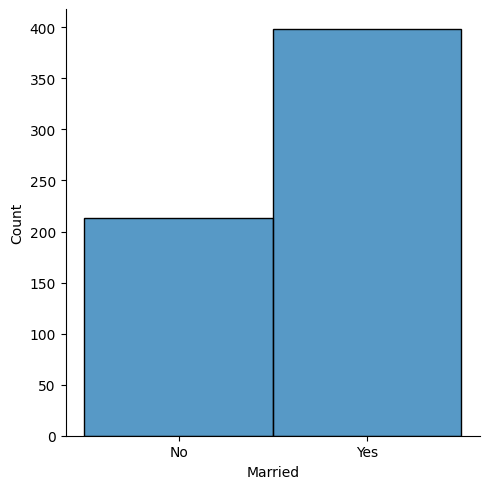

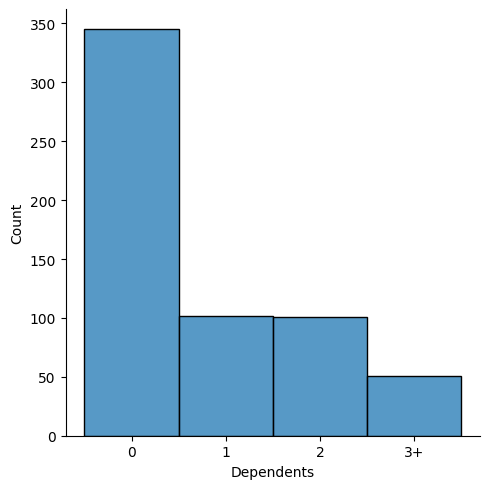

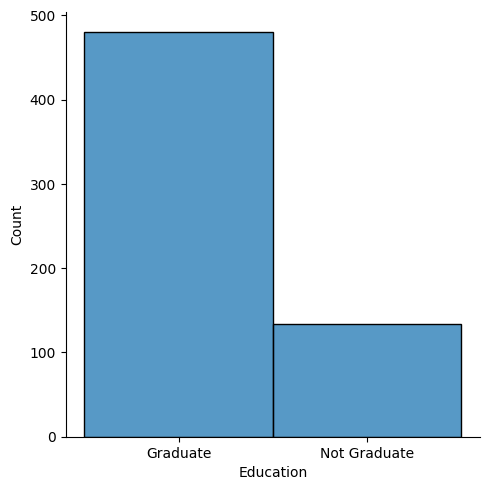

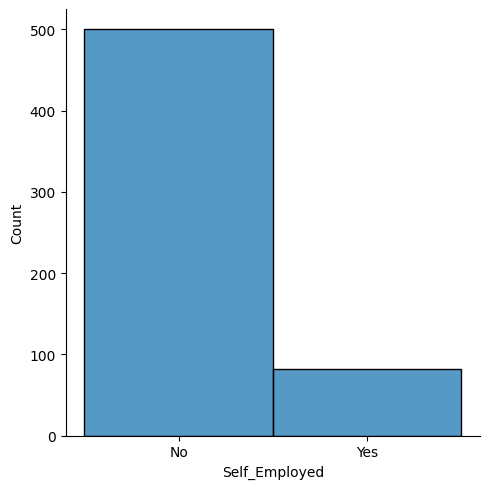

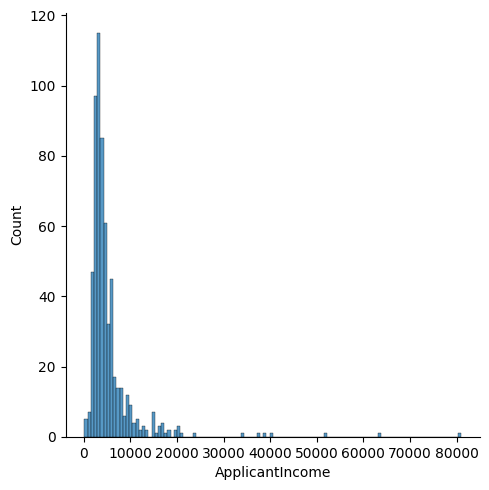

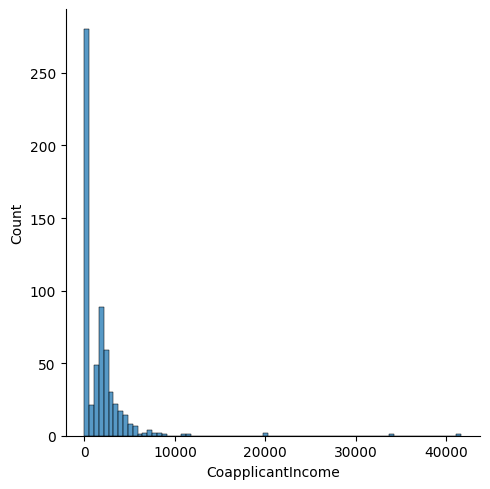

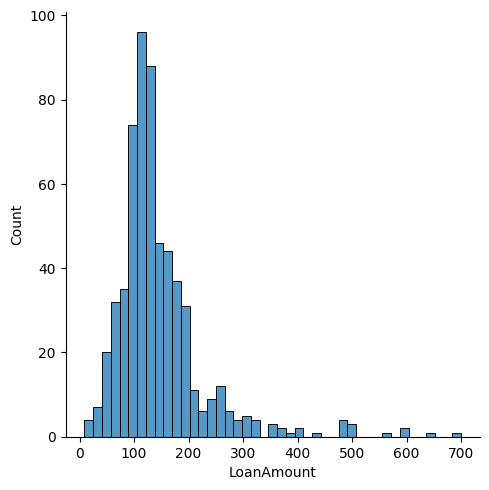

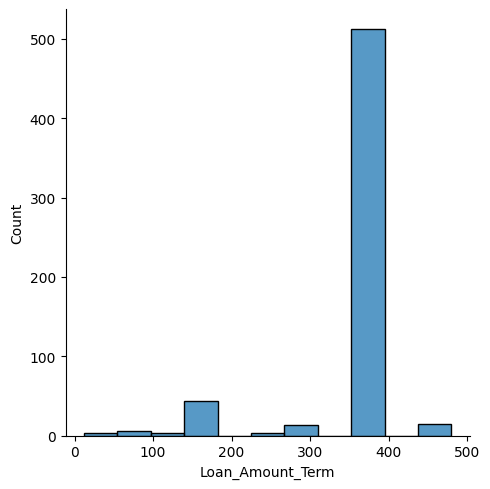

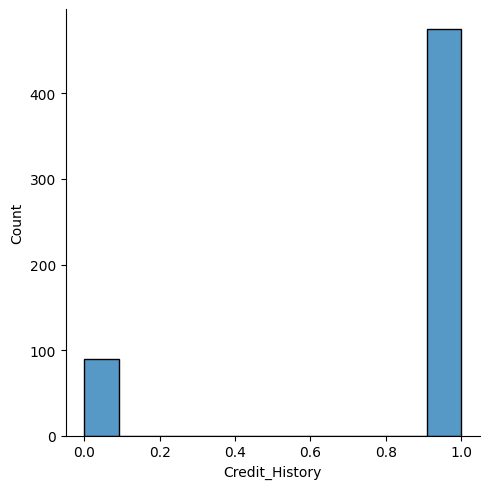

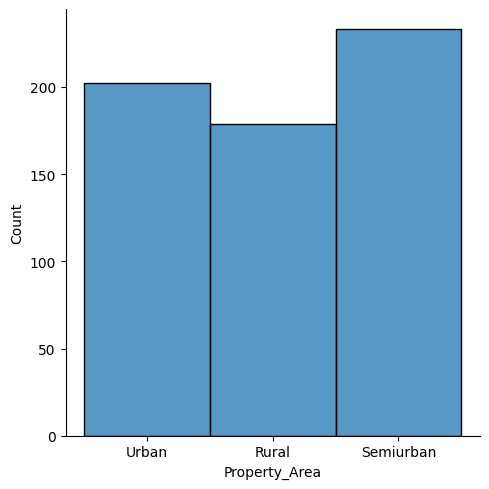

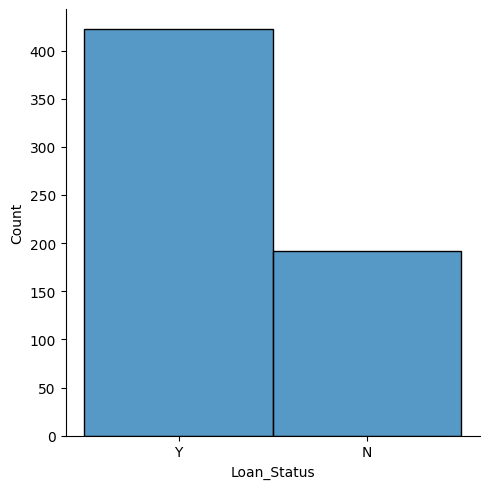

In [11]:
# @title
# creating a for loop to get the distribution plot for all columns
for column in loan_dataset:
  sns.displot(x=column, data=loan_dataset)

**Dealing with missing values**

In [13]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# getting the missing value percentage
null_data = loan_dataset.isnull().sum()/614*100
print(null_data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [5]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [6]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
loan_dataset.shape
# shows how many rows(entries) got removed


(480, 13)

**Dealing with Outliers**

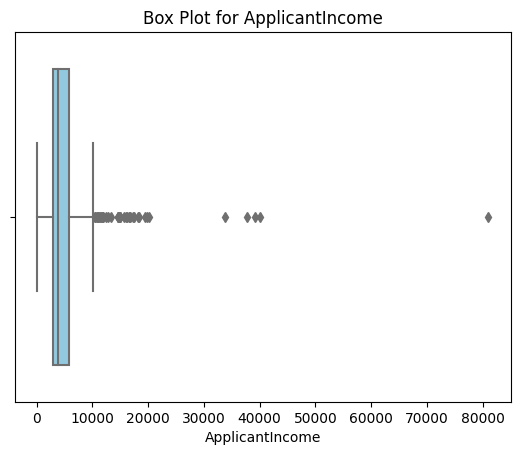

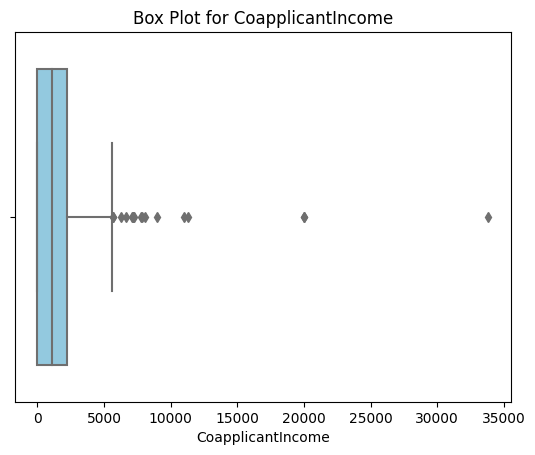

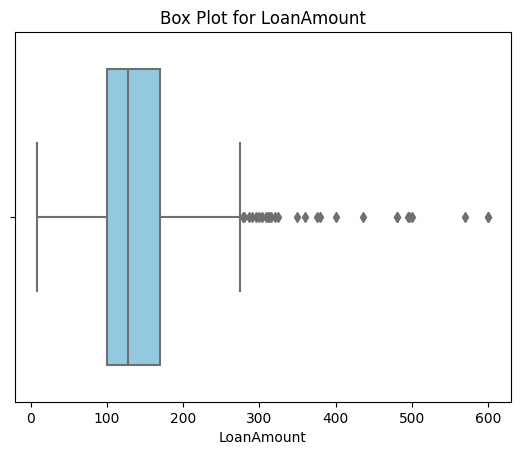

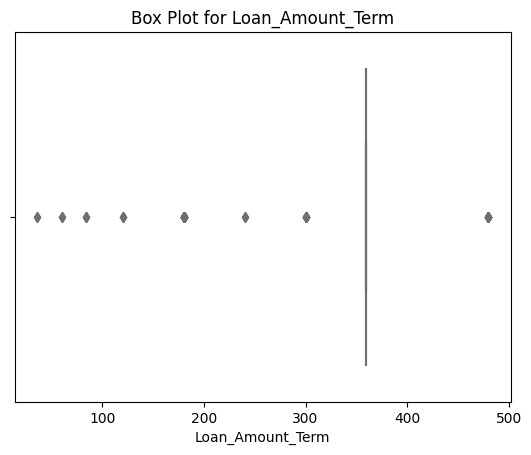

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

# Create separate box plots for each column
for column in columns_to_plot:
    plt.figure()
    sns.boxplot(x=column, data=loan_dataset, color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.show()


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

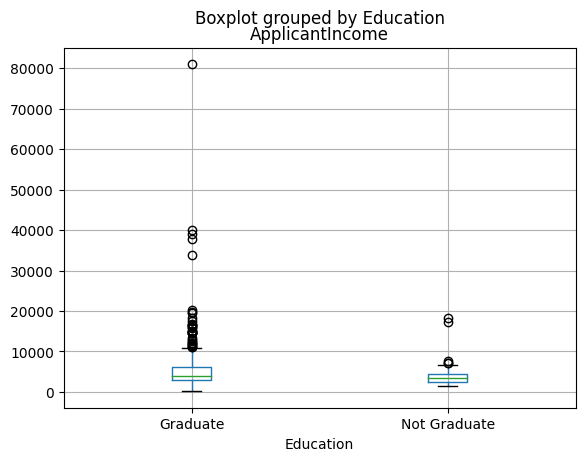

In [ ]:
loan_dataset.boxplot(column='ApplicantIncome', by = 'Education')


We can see that there is no substantial different between the mean income of graduate and non-graduates. But graduates with a very high incomes are appearing to be the outliers



<Axes: title={'center': 'CoapplicantIncome'}, xlabel='Education'>

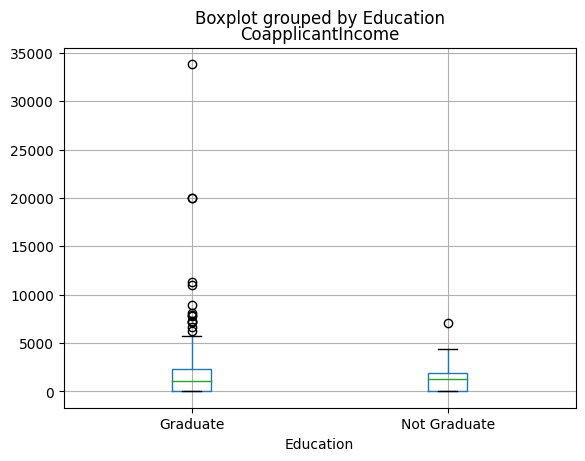

In [17]:
loan_dataset.boxplot(column='CoapplicantIncome', by = 'Education')

In [ ]:
#Even for Coapplicant Income gradudes are the majority outliers

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Married'>

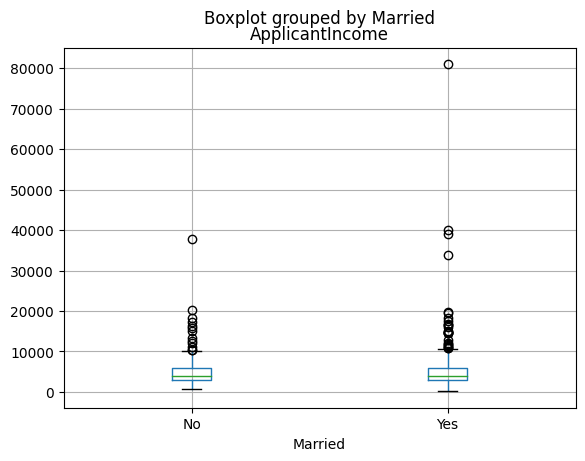

In [18]:
loan_dataset.boxplot(column='ApplicantIncome', by = 'Married')


both married and not married have equal share of outliers

The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs and graduates do tend to have extreme income in comparison to non graduates. So instead of treating them as outliers, let’s try a log transformation to nullify their effect

**Class Imbalance**

<Axes: xlabel='Loan_Status', ylabel='count'>

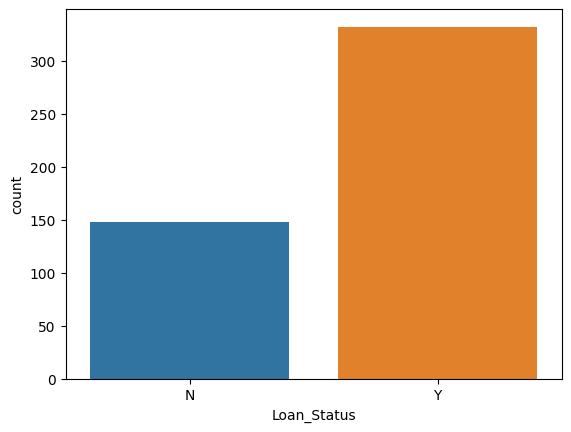

In [19]:
sns.countplot(x='Loan_Status', data=loan_dataset)
#class is imbalanced (can considee using SMOTE)

In [39]:
# grouping based on the class label 'loan_status' to compare means of the two class variables
loan_dataset.groupby('Loan_Status').mean()

<ipython-input-39-79cd2b4323c9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_dataset.groupby('Loan_Status').mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


**Corrleration Matrix**

<ipython-input-9-d504a5b5bc76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_dataset.corr()


<Axes: >

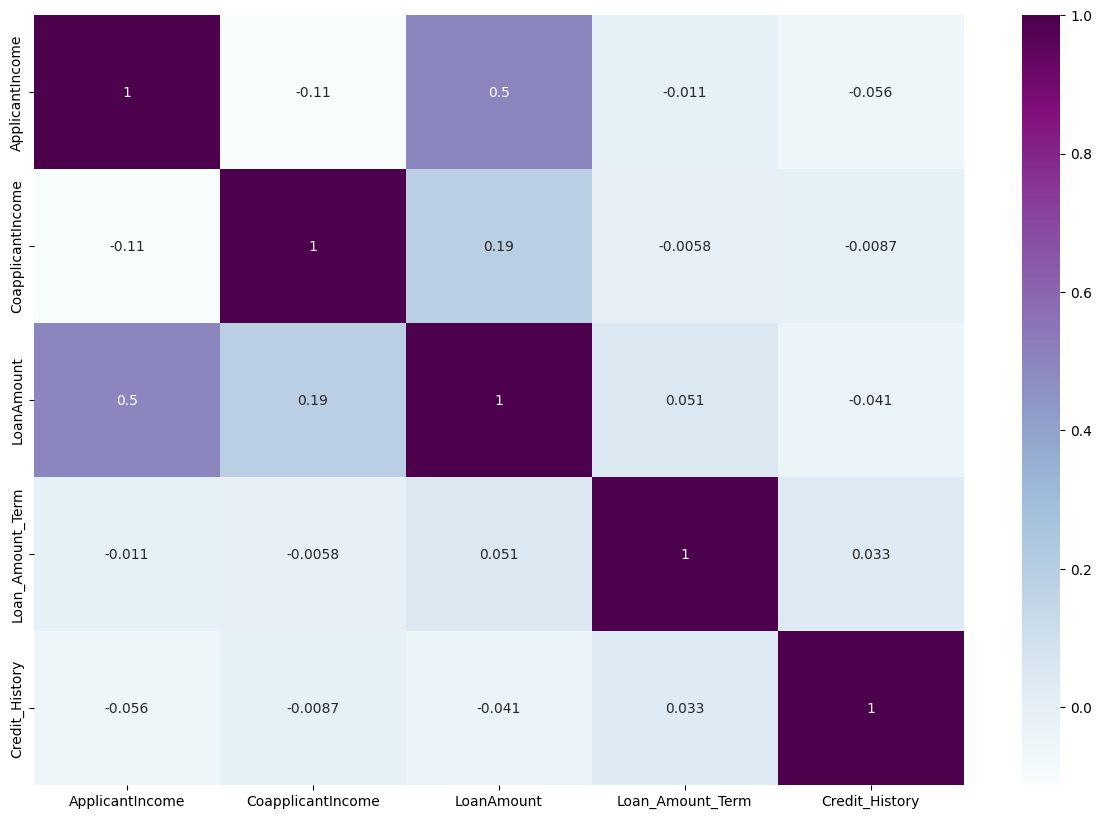

In [9]:
corr = loan_dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

loan amount and applicant income does seem to have a correlation

In [22]:

import statsmodels.api as sm
from statsmodels.formula.api import ols


# Perform one-way ANOVA
model = ols('LoanAmount ~ ApplicantIncome', data=loan_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq     df          F        PR(>F)
ApplicantIncome  7.616735e+05    1.0  155.39076  4.447413e-31
Residual         2.342996e+06  478.0        NaN           NaN


there is a significant association between loan amount and applicant Income

In [23]:

from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(loan_dataset['Married'], loan_dataset['Loan_Status'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 5.557140235492528
P-value: 0.018405456386355375
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 52.10833333 116.89166667]
 [ 95.89166667 215.10833333]]


The P value for Married in relation to Loan Status is below the threshold that means there is a significant association between them.

**Feature Selection**

In [9]:
# dropping unnecessary columns
cols = ['Loan_ID']
loan_dataset = loan_dataset.drop(columns=cols, axis=1)
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


**Label Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    loan_dataset[col] = le.fit_transform(loan_dataset[col])

In [19]:
loan_dataset.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [20]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


**Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation**





In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# specify input and output attributes
X = loan_dataset.drop(columns=['Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=36)



scaler = StandardScaler()
X_train[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount']] = scaler.fit_transform(X_train[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount']])
# Scaling the test set based on the statistical parameters of the training set (optional)
X_test[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount']] = scaler.transform(X_test[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount']])


# Applying SMOTE to handle imbalance
sm = SMOTE(random_state=34)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your feature and target matrices
model = RandomForestClassifier()
model.fit(X_train_res, y_train_res)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X_train_res.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Print or visualize the results
print(importances_df)

from sklearn.feature_selection import RFE

# Assuming model is your trained classifier
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X_train_res, y_train_res)

# Create a DataFrame to display feature names and their ranking
ranking_df = pd.DataFrame({'Feature': X_train_res.columns, 'Ranking': fit.ranking_})
ranking_df = ranking_df.sort_values(by='Ranking')

# Print or visualize the results
print(ranking_df)



# Keep only the selected features
#X_train_res = X_train_res.loc[:, selected_features]
#X_test = X_test.loc[:, selected_features]



              Feature  Importance
9      Credit_History    0.253610
5     ApplicantIncome    0.195256
7          LoanAmount    0.192372
6   CoapplicantIncome    0.122103
10      Property_Area    0.056817
2          Dependents    0.047371
8    Loan_Amount_Term    0.046774
1             Married    0.028633
0              Gender    0.023990
3           Education    0.017482
4       Self_Employed    0.015591
              Feature  Ranking
5     ApplicantIncome        1
7          LoanAmount        2
9      Credit_History        3
6   CoapplicantIncome        4
8    Loan_Amount_Term        5
2          Dependents        6
10      Property_Area        7
1             Married        8
0              Gender        9
3           Education       10
4       Self_Employed       11


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance using accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

from sklearn.ensemble import ExtraTreesClassifier

# Initialize Extra Trees Classifier
et_model = ExtraTreesClassifier(random_state=42)

# Train the model
et_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_et = et_model.predict(X_test)

# Evaluate the model performance using accuracy
accuracy_et = accuracy_score(y_test, y_pred_et)
print("Extra Trees Accuracy:", accuracy_et)

from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model performance using accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model performance using accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbc_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model performance using accuracy
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Gradient Boosting Accuracy:", accuracy_gbc)




Random Forest Accuracy: 0.7708333333333334
Extra Trees Accuracy: 0.7395833333333334
KNN Accuracy: 0.71875
Decision Tree Accuracy: 0.6770833333333334
Gradient Boosting Accuracy: 0.7708333333333334


**Confusion Matrix**

Random forest

Confusion Matrix:
[[17 15]
 [ 7 57]]
Matthews Correlation Coefficient: 0.45927932677184585
Accuracy: 0.7708333333333334
Precision: 0.7916666666666666
F1 Score: 0.8382352941176471


<Axes: >

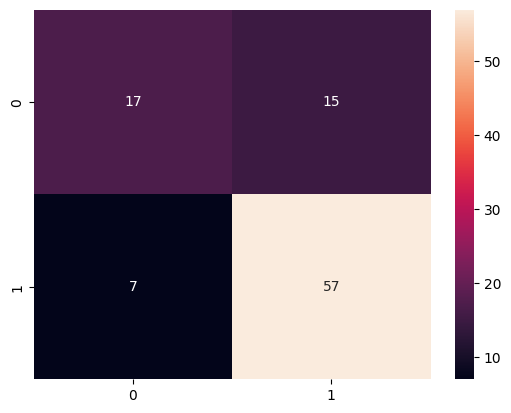

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_rf)

from sklearn.metrics import matthews_corrcoef

# Assuming y_true and y_pred are your true labels and predicted labels
mcc_score_rf = matthews_corrcoef(y_test, y_pred_rf)

print("Matthews Correlation Coefficient:", mcc_score_rf)


# Calculate and display the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

from sklearn.metrics import precision_score

# Assuming y_true and y_pred are your true labels and predicted labels
precision_rf = precision_score(y_test, y_pred_rf)

print("Precision:", precision_rf)

from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true labels and predicted labels
f1_rf = f1_score(y_test, y_pred_rf)

print("F1 Score:", f1_rf)



sns.heatmap(conf_matrix_rf, annot=True)


Decision Trees

Confusion Matrix:
[[16 16]
 [15 49]]
Matthews Correlation Coefficient: 0.26779125976949475
Accuracy: 0.6770833333333334
Precision: 0.7538461538461538
F1 Score: 0.7596899224806202


<Axes: >

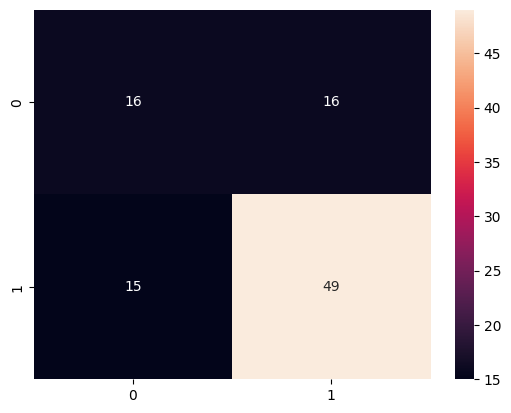

In [15]:

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_dt)

from sklearn.metrics import matthews_corrcoef

# Assuming y_true and y_pred are your true labels and predicted labels
mcc_score_dt = matthews_corrcoef(y_test, y_pred_dt)

print("Matthews Correlation Coefficient:", mcc_score_dt)


# Calculate and display the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

from sklearn.metrics import precision_score

# Assuming y_true and y_pred are your true labels and predicted labels
precision_dt = precision_score(y_test, y_pred_dt)

print("Precision:", precision_dt)

from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true labels and predicted labels
f1_dt = f1_score(y_test, y_pred_dt)

print("F1 Score:", f1_dt)



sns.heatmap(conf_matrix_dt, annot=True)


Extra Trees

Confusion Matrix:
[[16 16]
 [ 9 55]]
Matthews Correlation Coefficient: 0.38602342481647695
Accuracy: 0.7395833333333334
Precision: 0.7746478873239436
F1 Score: 0.8148148148148148


<Axes: >

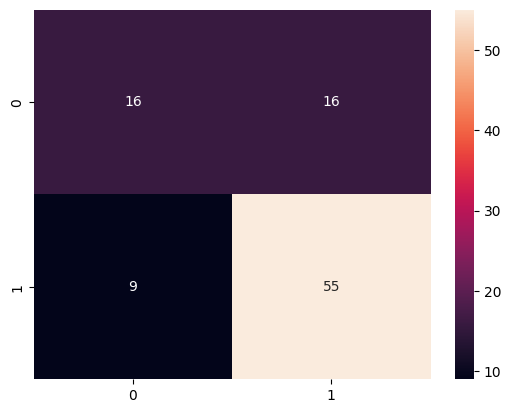

In [16]:

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_et)

from sklearn.metrics import matthews_corrcoef

# Assuming y_true and y_pred are your true labels and predicted labels
mcc_score_et = matthews_corrcoef(y_test, y_pred_et)

print("Matthews Correlation Coefficient:", mcc_score_et)


# Calculate and display the accuracy
accuracy_et = accuracy_score(y_test, y_pred_et)
print("Accuracy:", accuracy_et)

from sklearn.metrics import precision_score

# Assuming y_true and y_pred are your true labels and predicted labels
precision_et = precision_score(y_test, y_pred_et)

print("Precision:", precision_et)

from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true labels and predicted labels
f1_et = f1_score(y_test, y_pred_et)

print("F1 Score:", f1_et)



sns.heatmap(conf_matrix_et, annot=True)


KNN

Confusion Matrix:
[[21 11]
 [16 48]]
Matthews Correlation Coefficient: 0.3934879907959015
Accuracy: 0.71875
Precision: 0.8135593220338984
F1 Score: 0.7804878048780488


<Axes: >

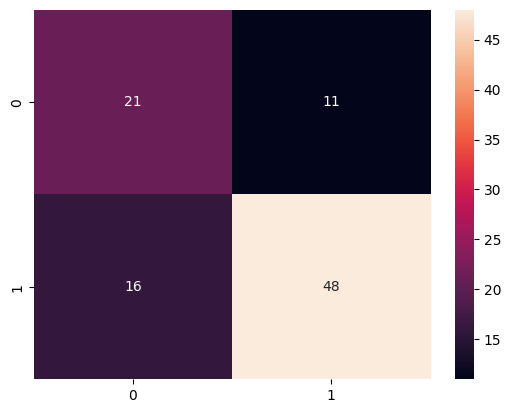

In [17]:

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_knn)

from sklearn.metrics import matthews_corrcoef

# Assuming y_true and y_pred are your true labels and predicted labels
mcc_score_knn = matthews_corrcoef(y_test, y_pred_knn)

print("Matthews Correlation Coefficient:", mcc_score_knn)


# Calculate and display the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

from sklearn.metrics import precision_score

# Assuming y_true and y_pred are your true labels and predicted labels
precision_knn = precision_score(y_test, y_pred_knn)

print("Precision:", precision_knn)

from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true labels and predicted labels
f1_knn = f1_score(y_test, y_pred_knn)

print("F1 Score:", f1_knn)



sns.heatmap(conf_matrix_knn, annot=True)


Gradient Boosting Classifier

Confusion Matrix:
[[17 15]
 [ 7 57]]
Matthews Correlation Coefficient: 0.45927932677184585
Accuracy: 0.7708333333333334
Precision: 0.7916666666666666
F1 Score: 0.8382352941176471


<Axes: >

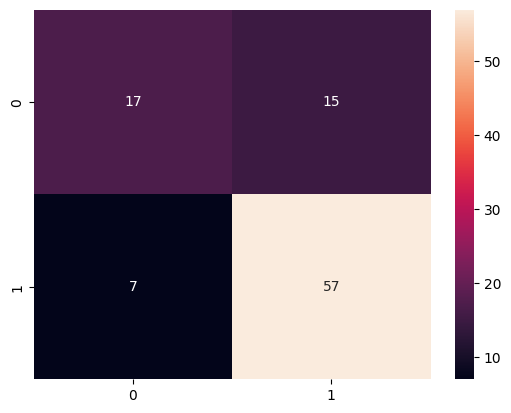

In [18]:

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_gbc)

from sklearn.metrics import matthews_corrcoef

# Assuming y_true and y_pred are your true labels and predicted labels
mcc_score_gbc = matthews_corrcoef(y_test, y_pred_gbc)

print("Matthews Correlation Coefficient:", mcc_score_gbc)


# Calculate and display the accuracy
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", accuracy_gbc)

from sklearn.metrics import precision_score

# Assuming y_true and y_pred are your true labels and predicted labels
precision_gbc = precision_score(y_test, y_pred_gbc)

print("Precision:", precision_gbc)

from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true labels and predicted labels
f1_gbc = f1_score(y_test, y_pred_gbc)

print("F1 Score:", f1_gbc)



sns.heatmap(conf_matrix_gbc, annot=True)


ROC CURVES

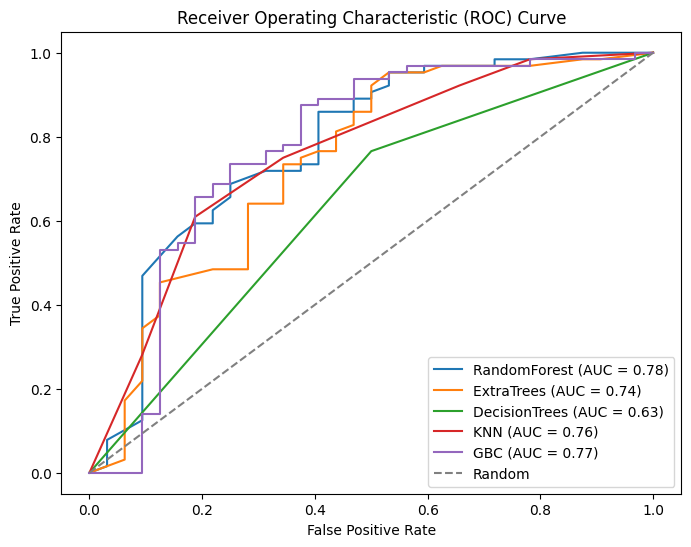

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have multiple models named model1, model2, etc.
models = [rf_model, et_model, dt_model, knn_model, gbc_model]
model_names = ['RandomForest','ExtraTrees','DecisionTrees','KNN','GBC']


plt.figure(figsize=(8, 6))

# Plot ROC curves for each model
for model, name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Wilcoxon test between knn and Random forest model for f1 score and MCC score

In [22]:
#F1 score of Random Forest and KNN
from scipy.stats import wilcoxon

statistic, p_value = wilcoxon(f1_knn, f1_rf)

# Check the p-value to determine if there is a significant difference
if p_value < 0.05:
    print("There is a significant difference between Model 1 and Model 2.")
else:
    print("There is no significant difference between Model 1 and Model 2.")


There is no significant difference between Model 1 and Model 2.


In [27]:
#MCC score of RandomForest and KNN
statistic, p_value = wilcoxon(mcc_score_knn, mcc_score_rf)

# Check the p-value to determine if there is a significant difference
if p_value < 0.05:
    print("There is a significant difference between Model 1 and Model 2.")
else:
    print("There is no significant difference between Model 1 and Model 2.")


There is no significant difference between Model 1 and Model 2.


Ensemble of KNN, GBC and Random Forest models for stability and reduce overfitting


Ensemble Confusion Matrix:
[[18 14]
 [ 7 57]]
Ensemble Accuracy: 0.78125
Matthews Correlation Coefficient: 0.48672518781207963
Precision: 0.8028169014084507
F1 Score: 0.8444444444444446


<Axes: >

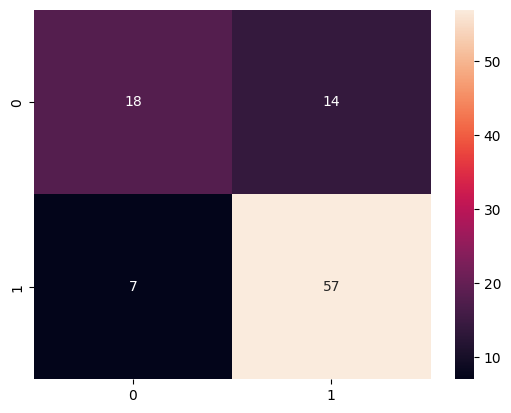

In [34]:
from sklearn.ensemble import VotingClassifier
# Create an ensemble of Random Forest and KNN
ensemble_model = VotingClassifier(estimators=[('RandomForest', rf_model), ('KNN', knn_model), ('GBC', gbc_model)], voting='hard')

# Fit the ensemble model
ensemble_model.fit(X_train_res, y_train_res)

# Make predictions on new data
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Display the confusion matrix
print("Ensemble Confusion Matrix:")
print(conf_matrix_ensemble)

# Calculate and display the accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy:", accuracy_ensemble)

# Assuming y_true and y_pred are your true labels and predicted labels
mcc_score_ensemble = matthews_corrcoef(y_test, y_pred_ensemble)

print("Matthews Correlation Coefficient:", mcc_score_ensemble)



# Assuming y_true and y_pred are your true labels and predicted labels
precision_ensemble = precision_score(y_test, y_pred_ensemble)

print("Precision:", precision_ensemble)

from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true labels and predicted labels
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print("F1 Score:", f1_ensemble)



# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix_ensemble, annot=True)

Efficiency

In [40]:

import time

# Initialize the model (replace with your preferred model)
ensemble_model = VotingClassifier(estimators=[('RandomForest', rf_model), ('KNN', knn_model), ('GBC', gbc_model)], voting='hard')

# Measure Training Time
start_time = time.time()
ensemble_model.fit(X_train_res, y_train_res)
training_time = time.time() - start_time

# Measure Testing Time
start_time = time.time()
y_pred_ensemble = ensemble_model.predict(X_test)
testing_time = time.time() - start_time

# Display Results
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")



Training Time: 0.6345 seconds
Testing Time: 0.0379 seconds
